In [1]:
import scipy
import matplotlib.pyplot as plt
import numpy as np  

In [2]:
res_hev = scipy.io.loadmat('joint_inv_heavy.mat')
res_mid = scipy.io.loadmat('joint_inv_mid.mat')
res_lig = scipy.io.loadmat('joint_inv_light.mat')

In [3]:
dep = res_hev['dep'].flatten()
dis = res_hev['dist'].flatten()

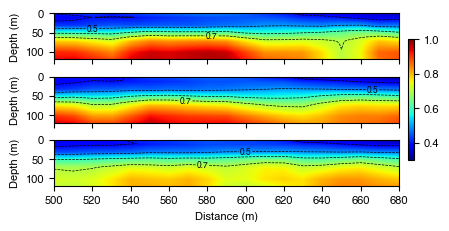

In [97]:
fontsize = 8
plt.rcParams.update({
        "axes.labelsize": fontsize,
        "xtick.labelsize": fontsize,
        "ytick.labelsize": fontsize,
        "legend.fontsize": fontsize,
        "figure.titlesize": fontsize,
        "font.family": 'Helvetica'
})



fig, axs = plt.subplots(3, 1, figsize=(7, 2.2), constrained_layout=True)
extent = [0+500, 180+500, 0.215*1000, 0]
aspect = 1/5
im1 = axs[0].imshow(res_lig['grid_model_fine'], extent=extent, cmap='jet', vmin=0.3, vmax=1, aspect=aspect)
im2 = axs[1].imshow(res_mid['grid_model_fine'], extent=extent, cmap='jet', vmin=0.3, vmax=1, aspect=aspect)
im3 = axs[2].imshow(res_hev['grid_model_fine'], extent=extent, cmap='jet', vmin=0.3, vmax=1, aspect=aspect)
ims = [im1, im2, im3]

# Contour plotting
levels = np.array([0.4, 0.5, 0.6, 0.7]) 
# Assuming your grid data is compatible with contour plotting; you may need to adjust x, y, and z dimensions.
x = np.linspace(extent[0], extent[1], res_lig['grid_model_fine'].shape[1])
y = np.linspace(extent[3], extent[2], res_lig['grid_model_fine'].shape[0])
X, Y = np.meshgrid(x, y)

CT1 = axs[0].contour(X, Y, res_lig['grid_model_fine'], levels=levels, colors='k', linestyles='dashed', linewidths=0.5)
CT2 = axs[1].contour(X, Y, res_mid['grid_model_fine'], levels=levels, colors='k', linestyles='dashed', linewidths=0.5)
CT3 = axs[2].contour(X, Y, res_hev['grid_model_fine'], levels=levels, colors='k', linestyles='dashed', linewidths=0.5)
axs[0].clabel(CT1, np.array([0.5, 0.7]) , inline=True, fontsize=6)
axs[1].clabel(CT2, np.array([0.5, 0.7]) , inline=True, fontsize=6)
axs[2].clabel(CT3, np.array([0.5, 0.7]) , inline=True, fontsize=6)
axs[0].set_xticklabels([])
axs[1].set_xticklabels([])
axs[0].set_ylabel("Depth (m)")
axs[1].set_ylabel("Depth (m)")
axs[2].set_ylabel("Depth (m)")
axs[0].set_yticks([0, 50, 100, 150, 200])
axs[1].set_yticks([0, 50, 100, 150, 200])
axs[2].set_yticks([0, 50, 100, 150, 200])
axs[2].set_xlabel("Distance (m)")
axs[0].set_ylim([120, 0])
axs[1].set_ylim([120, 0])
axs[2].set_ylim([120, 0])

cbar = fig.colorbar(ims[1], ax=axs[:], location='right', pad=0.00, shrink=0.7, aspect=20)
# cbar.ax.set_ylabel('Vs (m/s)', rotation=0, fontsize=12, labelpad=30,)

# Add subplot labels (a), (b), (c)
# axs[0].text(-0.19, 1.4, '(a)', transform=axs[0].transAxes, fontsize=8)
# axs[1].text(-0.19, 1.4, '(b)', transform=axs[1].transAxes, fontsize=8)
# axs[2].text(-0.19, 1.4, '(c)', transform=axs[2].transAxes, fontsize=8)


plt.savefig('Vs-2D.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [16]:
res_hev['grid_model_fine'].min()

0.3195643382970715